<pre>
Name: Ritika Sarkar
Reg. No.: 19BAI1031
</pre>

### Fourier Transformation

Dataset - [Histopathologic Cancer Detection](https://www.kaggle.com/c/histopathologic-cancer-detection)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
from google.colab.patches import cv2_imshow

#### Importing Dataset

In [6]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle competitions download histopathologic-cancer-detection

  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 13.7MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.7MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 63.6MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 46.9MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 28.6MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.5MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 24.6MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 28.3MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 28.1MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 19.4MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 25.5MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 27.9MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 23.3MB/s]
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [0

#### Importing the image

Image 1

In [10]:
im1 = cv2.imread('/content/00001b2b5609af42ab0ab276dd4cd41c3e7745b5.tif')

In [11]:
im1.shape

(96, 96, 3)

In [12]:
reimage1 = cv2.resize(im1, (150,150), interpolation = cv2.INTER_AREA)

In [13]:
# converting to grayscale
grayimg1 = cv2.cvtColor(reimage1, cv2.COLOR_BGR2GRAY)

Original image


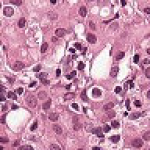

In [14]:
print("Original image")
cv2_imshow(reimage1)

Gray image


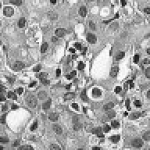

In [15]:
print("Gray image")
cv2_imshow(grayimg1)

Image 2

In [16]:
im2 = cv2.imread('/content/0000da768d06b879e5754c43e2298ce48726f722.tif')

In [17]:
im2.shape

(96, 96, 3)

In [18]:
reimage2 = cv2.resize(im2, (150,150), interpolation = cv2.INTER_AREA)

In [19]:
# converting to grayscale
grayimg2 = cv2.cvtColor(reimage2, cv2.COLOR_BGR2GRAY)

Original image


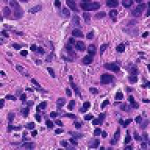

In [20]:
print("Original image")
cv2_imshow(reimage2)

Gray image


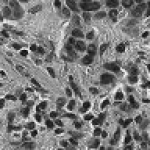

In [21]:
print("Gray image")
cv2_imshow(grayimg2)

Image 3

In [28]:
im3 = cv2.imread('/content/000c8db3e09f1c0f3652117cf84d78aae100e5a7.tif')

In [29]:
im3.shape

(96, 96, 3)

In [30]:
reimage3 = cv2.resize(im3, (150,150), interpolation = cv2.INTER_AREA)

In [31]:
# converting to grayscale
grayimg3 = cv2.cvtColor(reimage3, cv2.COLOR_BGR2GRAY)

Original image


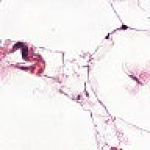

In [32]:
print("Original image")
cv2_imshow(reimage3)

Gray image


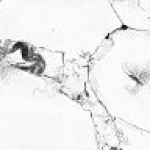

In [33]:
print("Gray image")
cv2_imshow(grayimg3)

#### Discrete Fourier Transformation

##### 1. Numpy

Image 1

Input image


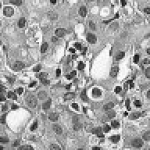

DFT: 
 [[ 3.65193600e+06    +0.j          1.15238890e+03+11691.60521747j
  -5.93797723e+04-38945.53312835j ... -6.50814382e+02  +586.6857377j
  -5.93797723e+04+38945.53312835j  1.15238890e+03-11691.60521747j]
 [-1.35275892e+03-77900.59051202j  2.03919809e+04-31705.79421583j
   3.01103252e+04+41522.05516609j ... -5.12396783e+04-46899.73452504j
   7.00992753e+03 -3888.36058987j -6.98753298e+03+38307.17082263j]
 [ 5.89481015e+03+35276.15568111j -3.56935916e+04+50467.13897851j
  -2.94622076e+04 -9776.430385j   ...  8.66819239e+03-10769.46027872j
  -6.17091720e+04-16513.67878576j -5.51076681e+04-35001.5976998j ]
 ...
 [-4.12493211e+04+59378.8996276j  -4.89890550e+04 +2486.88458487j
  -6.86691629e+03 +4541.76629335j ...  1.08887232e+04+26442.26512577j
  -4.24649626e+04-43649.4152174j  -3.79972279e+04  -826.81703654j]
 [ 5.89481015e+03-35276.15568111j -5.51076681e+04+35001.5976998j
  -6.17091720e+04+16513.67878576j ...  4.72535923e+04-16667.43641175j
  -2.94622076e+04 +9776.430385j   -3.56935

In [41]:
# DFT, Shift, Magnitude spectrum
f1 = np.fft.fft2(grayimg1) # DFT
fshift1 = np.fft.fftshift(f1) # Shift DC to center
mag_spec1 = 20*np.log(np.abs(fshift1)) # magnitude spectrum

# print out
print("Input image")
cv2_imshow(grayimg1)
print("DFT: \n", f1) 
# cv2_imshow(f1) # cannot plot the imaginary values of the complex array
print("\nSHIFT: \n", fshift1)
# cv2_imshow(fshift1) # cannot plot the imaginary values of the complex array

In [46]:
print("DC Component: ",f1[0,0])

DC Component:  (3651936+0j)


Input image


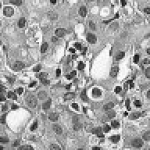

Magnitude spectrum


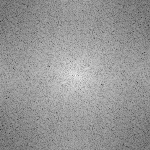

In [43]:
print("Input image")
cv2_imshow(grayimg1)
print("Magnitude spectrum")
cv2_imshow(mag_spec1)

Image 2

Input image


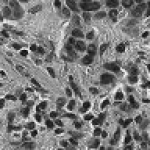

DFT: 
 [[ 2.75116900e+06    +0.j          3.49578458e+04-78363.36317057j
  -4.55017552e+04+16718.0628743j  ...  7.36614433e+04+19268.16203581j
  -4.55017552e+04-16718.0628743j   3.49578458e+04+78363.36317057j]
 [-6.41326474e+04-54258.6307217j  -3.40437697e+04-52293.84214304j
  -9.36261127e+03+43916.26969945j ...  2.16751497e+04 -7602.83454355j
  -8.16011290e+04+44015.89130293j  4.09132740e+03+10543.54903905j]
 [-3.54688313e+04-42547.97980239j -3.34867497e+04-22814.16425134j
   1.22806541e+04+38668.42475763j ... -1.89179642e+04-35512.30932332j
   1.40146040e+04+29697.01302914j -7.71731166e+03+73393.84269726j]
 ...
 [-8.11387430e+04-58555.87136638j  4.43142021e+04+20790.65783462j
   1.25335321e+04+33124.65358521j ...  4.34072343e+04-20637.31691609j
  -1.96388995e+04 -4624.0217735j   7.96626855e+03 -6980.45061143j]
 [-3.54688313e+04+42547.97980239j -7.71731166e+03-73393.84269726j
   1.40146040e+04-29697.01302914j ... -4.78031292e+03 -5894.95460485j
   1.22806541e+04-38668.42475763j -3.348

In [47]:
# DFT, Shift, Magnitude spectrum
f2 = np.fft.fft2(grayimg2) # DFT
fshift2 = np.fft.fftshift(f2) # Shift DC to center
mag_spec2 = 20*np.log(np.abs(fshift2)) # magnitude spectrum

# print out
print("Input image")
cv2_imshow(grayimg2)
print("DFT: \n", f2) 
# cv2_imshow(f2) # cannot plot the imaginary values of the complex array
print("\nSHIFT: \n", fshift2)
# cv2_imshow(fshift2) # cannot plot the imaginary values of the complex array

In [48]:
print("DC Component: ",f2[0,0])

DC Component:  (2751169+0j)


Input image


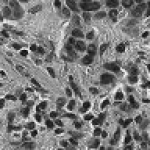

Magnitude spectrum


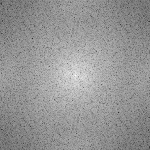

In [49]:
print("Input image")
cv2_imshow(grayimg2)
print("Magnitude spectrum")
cv2_imshow(mag_spec2)

Image 3

Input image


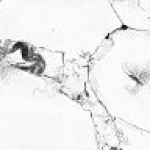

DFT: 
 [[ 5.31970700e+06     +0.j         -3.34296667e+04 +32729.49704358j
   3.02641920e+04 +49235.96644069j ...  2.74133481e+04 +18134.30770828j
   3.02641920e+04 -49235.96644069j -3.34296667e+04 -32729.49704358j]
 [ 1.31131039e+05 +67305.86862653j  6.70184947e+04 -21275.73663335j
   5.14106855e+04 -49596.95199293j ... -2.64076962e+04 -71533.24278953j
  -1.95954868e+04  +1986.04146217j -4.11067866e+04+135925.59571323j]
 [-3.51503802e+04 -76984.82335856j -6.18229439e+04 -20166.8108378j
  -6.39722800e+04  +5126.30412853j ... -5.66883211e+03 +50549.03648488j
   5.31706703e+04 +71892.65160744j  6.60711900e+04 -61625.52135728j]
 ...
 [-1.37494280e+04 -15359.22452405j -3.20536155e+04 +24172.1498318j
  -2.81291091e+04 +78926.51831096j ... -1.13595416e+04 -11385.99298813j
   2.07754883e+04 -40268.55371767j  4.70887097e+04 -33692.00481906j]
 [-3.51503802e+04 +76984.82335856j  6.60711900e+04 +61625.52135728j
   5.31706703e+04 -71892.65160744j ... -6.04299842e+03 +26179.73342359j
  -6.39722800e

In [50]:
# DFT, Shift, Magnitude spectrum
f3 = np.fft.fft2(grayimg3) # DFT
fshift3 = np.fft.fftshift(f3) # Shift DC to center
mag_spec3 = 20*np.log(np.abs(fshift3)) # magnitude spectrum

# print out
print("Input image")
cv2_imshow(grayimg3)
print("DFT: \n", f3) 
# cv2_imshow(f1) # cannot plot the imaginary values of the complex array
print("\nSHIFT: \n", fshift3)
# cv2_imshow(fshift1) # cannot plot the imaginary values of the complex array

In [51]:
print("DC Component: ",f3[0,0])

DC Component:  (5319707+0j)


Input image


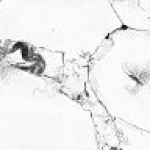

Magnitude spectrum


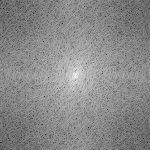

In [53]:
print("Input image")
cv2_imshow(grayimg3)
print("Magnitude spectrum")
cv2_imshow(mag_spec3)

##### 2. OpenCV

Image 1

Input image


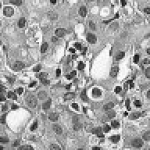

DFT: 
 [[[ 3.6519360e+06  0.0000000e+00]
  [ 1.1523882e+03  1.1691603e+04]
  [-5.9379773e+04 -3.8945531e+04]
  ...
  [-6.5081421e+02  5.8668506e+02]
  [-5.9379773e+04  3.8945531e+04]
  [ 1.1523882e+03 -1.1691603e+04]]

 [[-1.3527572e+03 -7.7900594e+04]
  [ 2.0391980e+04 -3.1705789e+04]
  [ 3.0110328e+04  4.1522055e+04]
  ...
  [-5.1239676e+04 -4.6899734e+04]
  [ 7.0099341e+03 -3.8883599e+03]
  [-6.9875337e+03  3.8307164e+04]]

 [[ 5.8948096e+03  3.5276156e+04]
  [-3.5693594e+04  5.0467137e+04]
  [-2.9462207e+04 -9.7764336e+03]
  ...
  [ 8.6681934e+03 -1.0769461e+04]
  [-6.1709180e+04 -1.6513676e+04]
  [-5.5107672e+04 -3.5001594e+04]]

 ...

 [[-4.1249328e+04  5.9378891e+04]
  [-4.8989051e+04  2.4868843e+03]
  [-6.8669170e+03  4.5417646e+03]
  ...
  [ 1.0888724e+04  2.6442266e+04]
  [-4.2464961e+04 -4.3649418e+04]
  [-3.7997234e+04 -8.2681824e+02]]

 [[ 5.8948096e+03 -3.5276152e+04]
  [-5.5107672e+04  3.5001594e+04]
  [-6.1709180e+04  1.6513676e+04]
  ...
  [ 4.7253594e+04 -1.6667434e+0

In [55]:
dft1 = cv2.dft(np.float32(grayimg1), flags = cv2.DFT_COMPLEX_OUTPUT) # DFT, convert image to np.float32
dft_shift1 = np.fft.fftshift(dft1) # shift
magspec1 = 20*np.log(cv2.magnitude(dft_shift1[:,:,0], dft_shift1[:,:,1])) # Magnitude spectrum, 2 channels

# print out
print("Input image")
cv2_imshow(grayimg1)
print("DFT: \n", dft1) 
print("\nSHIFT: \n", dft_shift1)

In [56]:
print("DC Component: ",dft1[0,0])

DC Component:  [3651936.       0.]


Input image


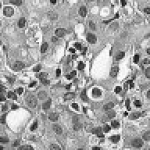

Magnitude spectrum


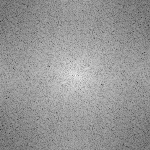

In [57]:
print("Input image")
cv2_imshow(grayimg1)
print("Magnitude spectrum")
cv2_imshow(magspec1)

Image 2

Input image


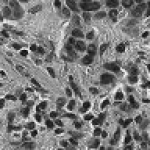

DFT: 
 [[[ 2.7511690e+06  0.0000000e+00]
  [ 3.4957844e+04 -7.8363367e+04]
  [-4.5501758e+04  1.6718066e+04]
  ...
  [ 7.3661445e+04  1.9268162e+04]
  [-4.5501758e+04 -1.6718066e+04]
  [ 3.4957844e+04  7.8363367e+04]]

 [[-6.4132648e+04 -5.4258625e+04]
  [-3.4043773e+04 -5.2293848e+04]
  [-9.3626094e+03  4.3916273e+04]
  ...
  [ 2.1675152e+04 -7.6028320e+03]
  [-8.1601125e+04  4.4015891e+04]
  [ 4.0913296e+03  1.0543549e+04]]

 [[-3.5468828e+04 -4.2547977e+04]
  [-3.3486750e+04 -2.2814160e+04]
  [ 1.2280654e+04  3.8668426e+04]
  ...
  [-1.8917969e+04 -3.5512312e+04]
  [ 1.4014604e+04  2.9697012e+04]
  [-7.7173096e+03  7.3393844e+04]]

 ...

 [[-8.1138734e+04 -5.8555871e+04]
  [ 4.4314203e+04  2.0790660e+04]
  [ 1.2533530e+04  3.3124656e+04]
  ...
  [ 4.3407230e+04 -2.0637316e+04]
  [-1.9638904e+04 -4.6240234e+03]
  [ 7.9662686e+03 -6.9804507e+03]]

 [[-3.5468832e+04  4.2547977e+04]
  [-7.7173096e+03 -7.3393844e+04]
  [ 1.4014604e+04 -2.9697012e+04]
  ...
  [-4.7803154e+03 -5.8949541e+0

In [58]:
dft2 = cv2.dft(np.float32(grayimg2), flags = cv2.DFT_COMPLEX_OUTPUT) # DFT, convert image to np.float32
dft_shift2 = np.fft.fftshift(dft2) 
magspec2 = 20*np.log(cv2.magnitude(dft_shift2[:,:,0], dft_shift2[:,:,1])) # 2 channels

# print out
print("Input image")
cv2_imshow(grayimg2)
print("DFT: \n", dft2) 
print("\nSHIFT: \n", dft_shift2)

In [59]:
print("DC Component: ",dft2[0,0])

DC Component:  [2751169.       0.]


Input image


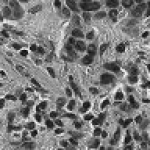

Magnitude spectrum


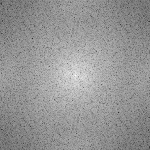

In [60]:
print("Input image")
cv2_imshow(grayimg2)
print("Magnitude spectrum")
cv2_imshow(magspec2)

Image 3

Input image


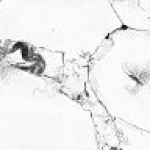

DFT: 
 [[[ 5.3197070e+06  0.0000000e+00]
  [-3.3429664e+04  3.2729496e+04]
  [ 3.0264189e+04  4.9235969e+04]
  ...
  [ 2.7413348e+04  1.8134309e+04]
  [ 3.0264189e+04 -4.9235969e+04]
  [-3.3429664e+04 -3.2729496e+04]]

 [[ 1.3113103e+05  6.7305867e+04]
  [ 6.7018500e+04 -2.1275738e+04]
  [ 5.1410688e+04 -4.9596957e+04]
  ...
  [-2.6407695e+04 -7.1533250e+04]
  [-1.9595484e+04  1.9860400e+03]
  [-4.1106789e+04  1.3592559e+05]]

 [[-3.5150383e+04 -7.6984820e+04]
  [-6.1822941e+04 -2.0166809e+04]
  [-6.3972277e+04  5.1263037e+03]
  ...
  [-5.6688335e+03  5.0549031e+04]
  [ 5.3170672e+04  7.1892656e+04]
  [ 6.6071188e+04 -6.1625523e+04]]

 ...

 [[-1.3749430e+04 -1.5359227e+04]
  [-3.2053617e+04  2.4172152e+04]
  [-2.8129109e+04  7.8926516e+04]
  ...
  [-1.1359542e+04 -1.1385993e+04]
  [ 2.0775486e+04 -4.0268555e+04]
  [ 4.7088711e+04 -3.3692008e+04]]

 [[-3.5150379e+04  7.6984820e+04]
  [ 6.6071188e+04  6.1625523e+04]
  [ 5.3170672e+04 -7.1892656e+04]
  ...
  [-6.0429990e+03  2.6179734e+0

In [61]:
dft3 = cv2.dft(np.float32(grayimg3), flags = cv2.DFT_COMPLEX_OUTPUT) # DFT, convert image to np.float32
dft_shift3 = np.fft.fftshift(dft3) 
magspec3 = 20*np.log(cv2.magnitude(dft_shift3[:,:,0], dft_shift3[:,:,1])) # 2 channels

# print out
print("Input image")
cv2_imshow(grayimg3)
print("DFT: \n", dft3) 
print("\nSHIFT: \n", dft_shift3)

In [62]:
print("DC Component: ",dft3[0,0])

DC Component:  [5319707.       0.]


Input image


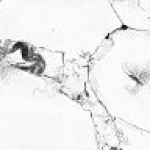

Magnitude spectrum


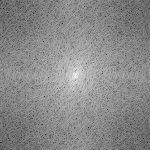

In [63]:
print("Input image")
cv2_imshow(grayimg3)
print("Magnitude spectrum")
cv2_imshow(magspec3)

#### Observation
1. The first image has medium brightness out of all the 3 images, and we observe that the DC component is around 3.6e+06 + 0j. The Magnitude spectrum also shows the white central region spread out quite a bit, showing that the image possesses an approximate balance of brightness and darkness. 
2. The second image has the lowest brightness, and the DC component is also lowest, 2.7e+06 +0j. The Magnitude spectrum shows a large spread of the white region in the centre, indicating that it is a darker image than the others.
3. The last image has the maximum brightness, and the DC component is the highest, 5.3e+06 + 0j. The Magnitude spectrum shows the white region concentrated towards the centre, indicating that it's a brighter image.
4. Both Numpy and OpenCV has same results.

#### Inverse Fourier Transform
Use High Pass Filter, apply inverse shift

##### 1. Numpy

Image 1

Input image


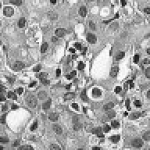

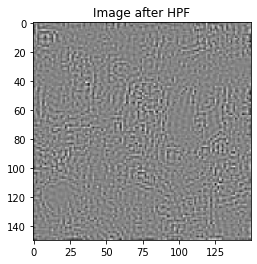

In [68]:
row,col = grayimg1.shape
crow, ccol = row//2, col//2
fshift1[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift1 = np.fft.ifftshift(fshift1)
im1_back = np.fft.ifft2(f_ishift1)
im1_back = np.real(im1_back)

print("Input image")
cv2_imshow(grayimg1)
plt.title("Image after HPF") # edge detection 
plt.imshow(im1_back,cmap='gray')

Image 2

Input image


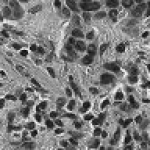

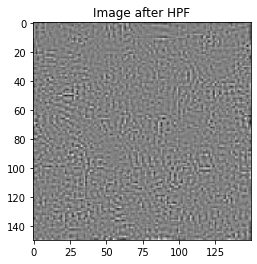

In [69]:
row,col = grayimg2.shape
crow, ccol = row//2, col//2
fshift2[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift2 = np.fft.ifftshift(fshift2)
im2_back = np.fft.ifft2(f_ishift2)
im2_back = np.real(im2_back)

print("Input image")
cv2_imshow(grayimg2)
plt.title("Image after HPF") 
plt.imshow(im2_back,cmap='gray')

Image 3

Input image


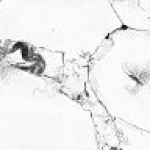

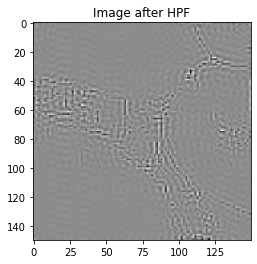

In [70]:
row,col = grayimg3.shape
crow, ccol = row//2, col//2
fshift3[crow-30:crow+31, ccol-30:ccol+31] = 0
f_ishift3 = np.fft.ifftshift(fshift3)
im3_back = np.fft.ifft2(f_ishift3)
im3_back = np.real(im3_back)

print("Input image")
cv2_imshow(grayimg3)
plt.title("Image after HPF")  
plt.imshow(im3_back,cmap='gray')

##### 2. OpenCV

Image 1

Input image


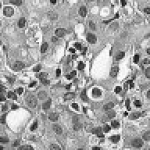

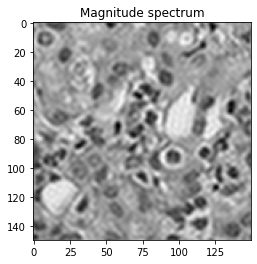

In [72]:
row,col = grayimg1.shape
crow, ccol = row//2, col//2
# create mask -> center 1, rest 0
mask = np.zeros((row,col,2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply the mask
fshift = dft_shift1*mask
f_ishift = np.fft.ifftshift(fshift)
im_back = cv2.idft(f_ishift)
im_back = cv2.magnitude(im_back[:,:,0], im_back[:,:,1])

print("Input image")
cv2_imshow(grayimg1)
plt.title("Magnitude spectrum") 
plt.imshow(im_back,cmap='gray')

Image 2

Input image


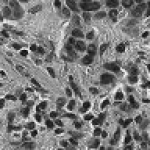

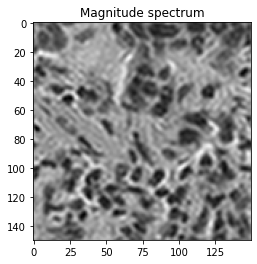

In [73]:
row,col = grayimg2.shape
crow, ccol = row//2, col//2
# create mask -> center 1, rest 0
mask = np.zeros((row,col,2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply the mask
fshift = dft_shift2*mask
f_ishift = np.fft.ifftshift(fshift)
im_back = cv2.idft(f_ishift)
im_back = cv2.magnitude(im_back[:,:,0], im_back[:,:,1])

print("Input image")
cv2_imshow(grayimg2)
plt.title("Magnitude spectrum") 
plt.imshow(im_back,cmap='gray')

Image 3

Input image


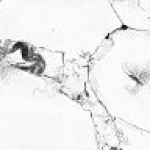

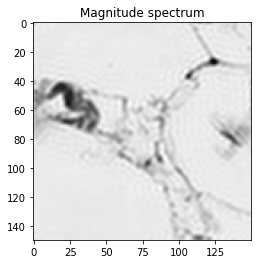

In [74]:
row,col = grayimg3.shape
crow, ccol = row//2, col//2
# create mask -> center 1, rest 0
mask = np.zeros((row,col,2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply the mask
fshift = dft_shift3*mask
f_ishift = np.fft.ifftshift(fshift)
im_back = cv2.idft(f_ishift)
im_back = cv2.magnitude(im_back[:,:,0], im_back[:,:,1])

print("Input image")
cv2_imshow(grayimg3)
plt.title("Magnitude spectrum") 
plt.imshow(im_back,cmap='gray')

#### Observation
1. The inverse Fourier transform using Numpy highlights the edges of the objects in the images, in the form of ripples. It is more clearly visible in Image 3 since it has less objects.
2. The IFT using OpenCV filters the lower frequency components in the image after applying a mask on the shifted DFT, and then reconstructs the image using IFT. A blurring effect is observed on the image, however we can observe almost the entire image reconstructed to resemble the original image.

References
1. [Fourier Transform](https://docs.opencv.org/3.4/de/dbc/tutorial_py_fourier_transform.html)